In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

# Veri setini yükleme ve hazırlama
df = pd.read_excel("rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx")
df = df[['Tarih', 'İstanbul günlük tüketim(m³/gün)']]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

# Eğitim ve test veri setlerini ayırma
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Özellikleri oluşturma
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'İstanbul günlük tüketim(m³/gün)'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# Veriyi normalize etme
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# SVR modelini oluşturma ve eğitme
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = svr_model.predict(X_test)

# Tahminleri orijinal ölçeğe döndürme
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# MSE ve RMSE değerlerini hesaplama
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))

# MAE hesaplama
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print("Mean Absolute Error (MAE): {:.4f}".format(mae))

# MAPE hesaplama
mape = mean_absolute_percentage_error(y_test_orig, y_pred_orig) * 100
print("Mean Absolute Percentage Error (MAPE): {:.4f}".format(mape))


Mean Squared Error (MSE): 0.0027
Root Mean Squared Error (RMSE): 0.0521
Mean Absolute Error (MAE): 0.0416
Mean Absolute Percentage Error (MAPE): 0.4021


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Veri setini yükleme ve hazırlama
df = pd.read_excel("rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx")
df = df[['Tarih', 'İstanbul günlük tüketim(m³/gün)']]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

In [24]:
df.describe()

,İstanbul günlük tüketim(m³/gün)
count,4714.000000
mean,10.209483
std,0.112351
min,9.877708
25%,10.137076
50%,10.220777
75%,10.286537
max,10.482346


In [18]:
SVMYPRED= y_pred_orig

In [19]:
SVMYPRED

array([[10.26559797],
       [10.26625609],
       [10.28722052],
       [10.28951585],
       [10.29144249],
       [10.29002695],
       [10.28882359],
       [10.28804176],
       [10.28796506],
       [10.28893644],
       [10.291339  ],
       [10.29252833],
       [10.29124446],
       [10.29016971],
       [10.28951281],
       [10.28955674],
       [10.29064387],
       [10.29315666],
       [10.29359953],
       [10.2924465 ],
       [10.29150035],
       [10.29096918],
       [10.29113537],
       [10.29234061],
       [10.29496666],
       [10.29465397],
       [10.29363089],
       [10.2928133 ],
       [10.29240868],
       [10.29269875],
       [10.29402447],
       [10.29676684],
       [10.29568952],
       [10.31774122],
       [10.31651102],
       [10.3155597 ],
       [10.3151865 ],
       [10.31575163],
       [10.31765624],
       [10.31985138],
       [10.31868989],
       [10.31758871],
       [10.31676986],
       [10.31653181],
       [10.3172338 ],
       [10

In [20]:
print(sum(SVMYPRED))

[9705.24277367]


In [21]:
len(SVMYPRED)

943

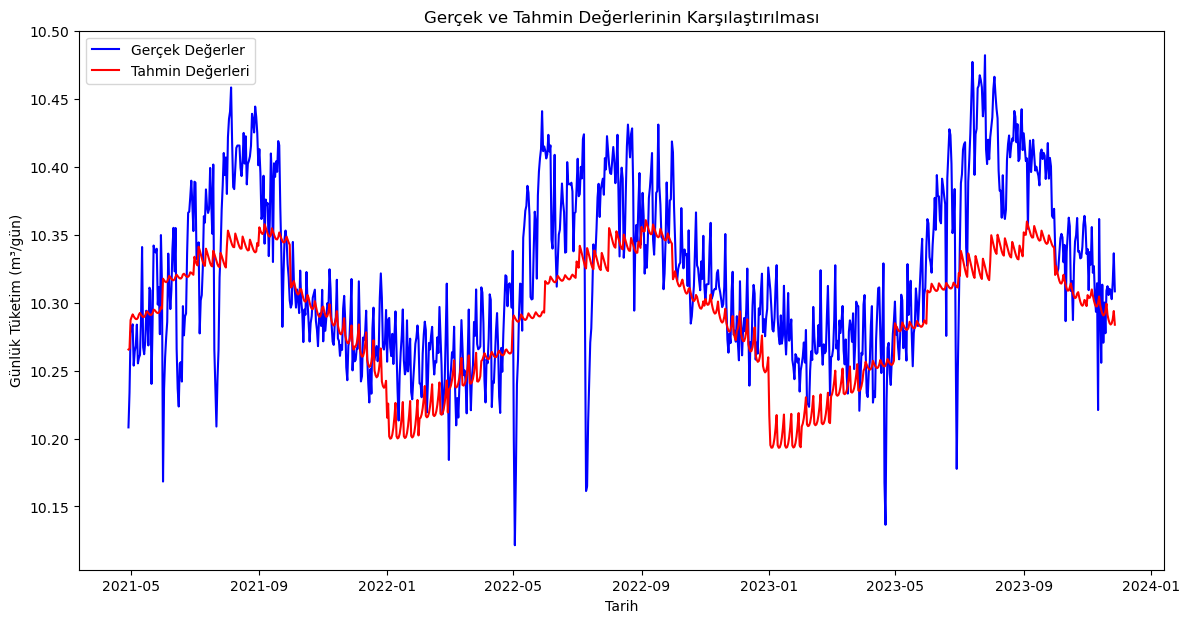

In [6]:
# Gerçek ve tahmin değerleri birleştirme
results = pd.DataFrame({'Tarih': test.index, 'Gerçek': y_test_orig.flatten(), 'Tahmin': y_pred_orig.flatten()})
results = results.set_index('Tarih')

# Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.title('Gerçek ve Tahmin Değerlerinin Karşılaştırılması')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()

In [7]:
from datetime import datetime, timedelta

# Gelecek 10 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=9)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 10 gün için özellikler oluşturma
forecast_features = create_features(pd.DataFrame(index=forecast_dates))

# Özellikleri normalize etme
forecast_features_normalized = scaler_X.transform(forecast_features)

# Gelecek 10 günün su tüketimini tahmin etme
forecast_scaled = svr_model.predict(forecast_features_normalized)

# Tahminleri orijinal ölçeklere dönüştürme
forecast = scaler_y.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results = pd.DataFrame({'Tarih': forecast_dates, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast})
forecast_results = forecast_results.set_index('Tarih')

print(forecast_results)

            Tahmin Edilen Su Tüketimi (m³/gün)
Tarih                                         
2023-11-28                           10.280274
2023-11-29                           10.277941
2023-11-30                           10.277192
2023-12-01                           10.288719
2023-12-02                           10.292950
2023-12-03                           10.300141
2023-12-04                           10.285716
2023-12-05                           10.282120
2023-12-06                           10.280025
2023-12-07                           10.279800


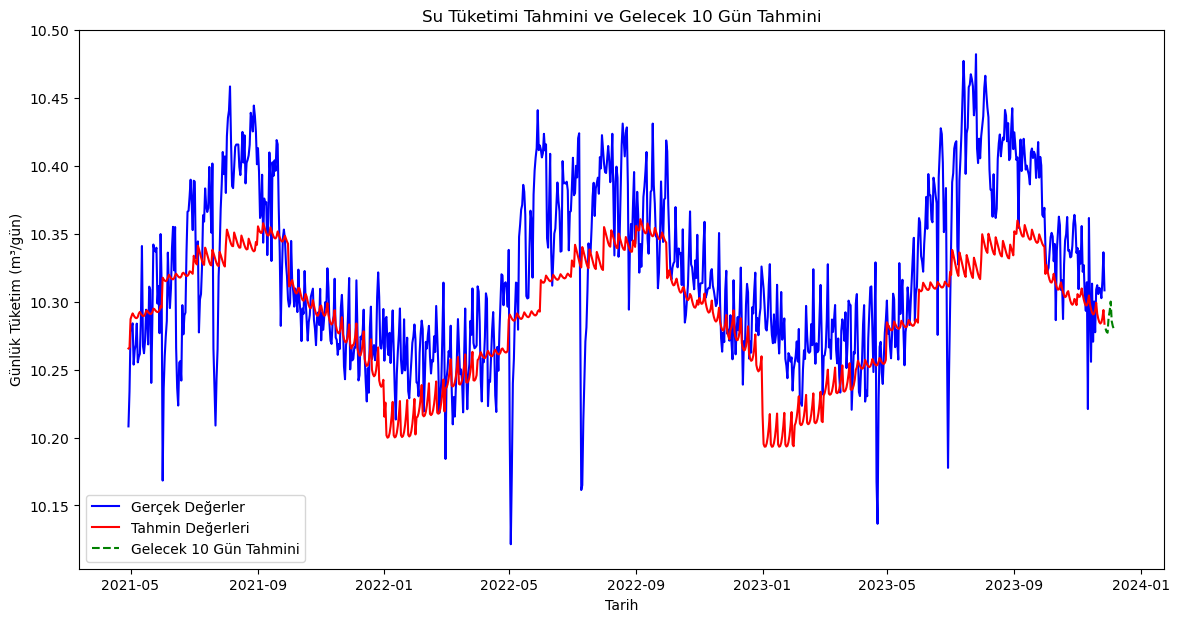

In [8]:
from datetime import datetime, timedelta

# Gelecek 10 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=9)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 10 gün için özellikler oluşturma
forecast_features = create_features(pd.DataFrame(index=forecast_dates))

# Özellikleri normalize etme
forecast_features_normalized = scaler_X.transform(forecast_features)

# Gelecek 10 günün su tüketimini tahmin etme
forecast_scaled = svr_model.predict(forecast_features_normalized)

# Tahminleri orijinal ölçeklere dönüştürme
forecast = scaler_y.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results = pd.DataFrame({'Tarih': forecast_dates, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast})
forecast_results = forecast_results.set_index('Tarih')

# Tahmin edilen su tüketimini görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.plot(forecast_results.index, forecast_results['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 10 Gün Tahmini', color='green', linestyle='--')
plt.title('Su Tüketimi Tahmini ve Gelecek 10 Gün Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()


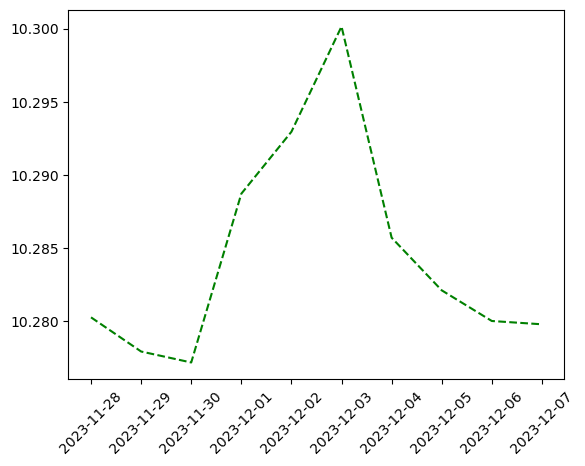

In [9]:
# Gelecek 10 günün tarihlerini daha iyi göstermek için x-eksenini ayarlama
plt.xticks(rotation=45)

# Tahmin edilen su tüketimini görselleştirme
plt.plot(forecast_results.index, forecast_results['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 10 Gün Tahmini', color='green', linestyle='--')


In [10]:
from datetime import datetime, timedelta

# Gelecek 365 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=364)
forecast_dates_1_year = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 1 yıl için özellikler oluşturma
forecast_features_1_year = create_features(pd.DataFrame(index=forecast_dates_1_year))

# Özellikleri normalize etme
forecast_features_normalized_1_year = scaler_X.transform(forecast_features_1_year)

# Gelecek 1 yılın su tüketimini tahmin etme
forecast_scaled_1_year = svr_model.predict(forecast_features_normalized_1_year)

# Tahminleri orijinal ölçeklere dönüştürme
forecast_1_year = scaler_y.inverse_transform(forecast_scaled_1_year.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results_1_year = pd.DataFrame({'Tarih': forecast_dates_1_year, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast_1_year})
forecast_results_1_year = forecast_results_1_year.set_index('Tarih')

forecast_results_1_year

,Tahmin Edilen Su Tüketimi (m³/gün)
Tarih,
2023-11-28,10.280274
2023-11-29,10.277941
2023-11-30,10.277192
2023-12-01,10.288719
2023-12-02,10.292950
...,...
2024-11-22,10.286374
2024-11-23,10.289057
2024-11-24,10.294379


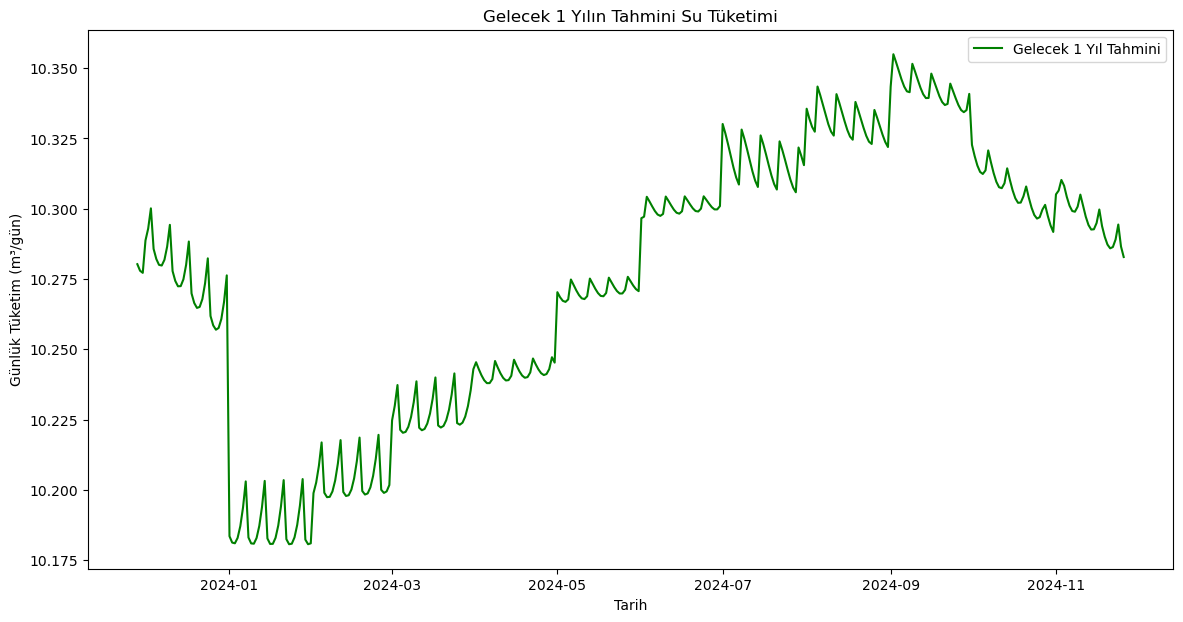

In [11]:
# Tahmin edilen su tüketimini görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(forecast_results_1_year.index, forecast_results_1_year['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 1 Yıl Tahmini', color='green')
plt.title('Gelecek 1 Yılın Tahmini Su Tüketimi')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()
